#Kavish Nag
#24070126085
#AIML B1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)

In [ ]:
temp_df =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
temp_df

,Actual,Predicted
95,16.9,16.407873
15,22.4,20.888710
30,21.4,21.553749
158,7.3,10.607860
128,24.7,22.110249
115,12.6,13.105210
69,22.3,21.055814
170,8.4,7.461513
174,11.5,13.607299
45,14.9,15.155124


In [ ]:
r2_score = ridge_model.score(X_test,y_test)
r2_score

0.8994388046339132

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.46084561659733

In [ ]:
#print coefficients
print(f"Alpha = {10}")
print(pd.Series(ridge_model.coef_,index = X.columns))

Alpha = 10
TV           0.044730
Radio        0.189131
Newspaper    0.002779
dtype: float64


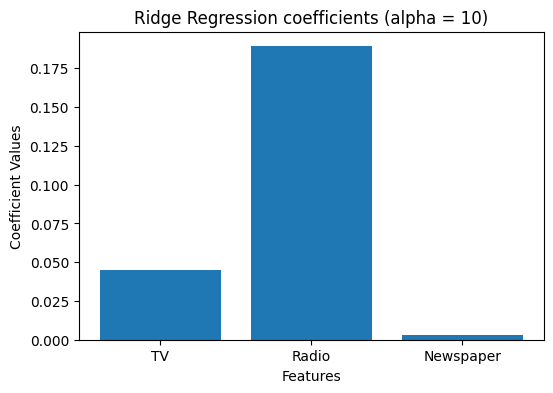

In [ ]:
#store coefficients
coeff = ridge_model.coef_

plt.figure(figsize=(6,4))
plt.bar(X.columns,coeff)
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title(f"Ridge Regression coefficients (alpha = {10})")
plt.show()

Alpha = 0.01 | Coefficients = [0.04472952 0.18919499 0.00276113]
Alpha = 0.01265 | Coefficients = [0.04472952 0.18919497 0.00276114]
Alpha = 0.016 | Coefficients = [0.04472952 0.18919495 0.00276114]
Alpha = 0.02024 | Coefficients = [0.04472952 0.18919493 0.00276115]
Alpha = 0.0256 | Coefficients = [0.04472952 0.18919489 0.00276116]
Alpha = 0.03237 | Coefficients = [0.04472952 0.18919485 0.00276117]
Alpha = 0.04095 | Coefficients = [0.04472952 0.18919479 0.00276119]
Alpha = 0.05179 | Coefficients = [0.04472952 0.18919472 0.00276121]
Alpha = 0.06551 | Coefficients = [0.04472952 0.18919464 0.00276123]
Alpha = 0.08286 | Coefficients = [0.04472952 0.18919453 0.00276126]
Alpha = 0.1048 | Coefficients = [0.04472952 0.18919439 0.0027613 ]
Alpha = 0.1326 | Coefficients = [0.04472952 0.18919421 0.00276135]
Alpha = 0.1677 | Coefficients = [0.04472952 0.18919399 0.00276141]
Alpha = 0.2121 | Coefficients = [0.04472952 0.1891937  0.00276149]
Alpha = 0.2683 | Coefficients = [0.04472952 0.18919335 0.0

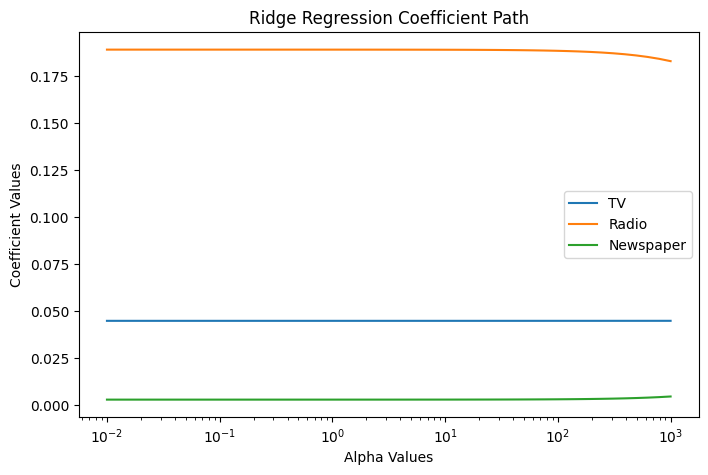

In [ ]:
alphas = np.logspace(-2,3,50)
coeff_path = []

for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  coeff_path.append(ridge.coef_)

  print(f"Alpha = {alpha:.4} | Coefficients = {ridge.coef_}")

#Convert to numpy array
coeff_path = np.array(coeff_path)
plt.figure(figsize=(8,5))
plt.xscale("log")
plt.plot(alphas,coeff_path)
plt.xlabel("Alpha Values")
plt.ylabel("Coefficient Values")
plt.title("Ridge Regression Coefficient Path")
plt.legend(X.columns)
plt.show()